# Pre-Owned Vehicle Price Prediction

## 1) Problem statement.

* We have a dataset about used cars sold on cardekho.com in India.
* Our goal is to create a model that can predict the price of a car based on its features.
* The predicted prices will help new sellers set their car prices according to market conditions.

## 2) Data Collection

* Data used in this project is sourced from Kaggle website.

### 2.1 Import Data and Required Packages

**Importing packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in the Pandas data frame
pd.pandas.set_option('display.max_columns',None)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Importing Cardekho dataset**

In [2]:
df = pd.read_csv("cardekho_dataset.csv", index_col = [0])

**First 10 Observations**

In [3]:
df.head(10)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


**Shape of dataset**

In [4]:
df.shape

(15411, 13)

**Checking datatypes and non-null counts**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


**Report**

*There are 13 columns, 6 object types and 7 number types*

## 3) Exploratory Data Analysis

**Extracting numerical features and continuous features**

In [6]:
df1 = df.copy()
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes !='object']
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes =='object']

In [7]:
#Printing both kinds of features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information:

* **car_name**: The complete name of the car, including the brand and specific model.
* **brand**: The brand name of the car.
* **model**: The exact model name of the car from a specific brand.
* **seller_type**: The type of seller offering the used car.
* **fuel_type**: The type of fuel the car uses.
* **transmission_type**: The type of transmission the car has.
* **vehicle_age**: The number of years since the car was purchased.
* **mileage**: The distance the car can travel per liter of fuel.
* **engine**: The engine capacity measured in cubic centimeters (cc).
* **max_power**: The maximum power output of the car in brake horsepower (BHP).
* **seats**: The total number of seats in the car.
* **selling_price**: The price at which the car is listed for sale on the website.

## Univariate Analysis

### Numerical Features

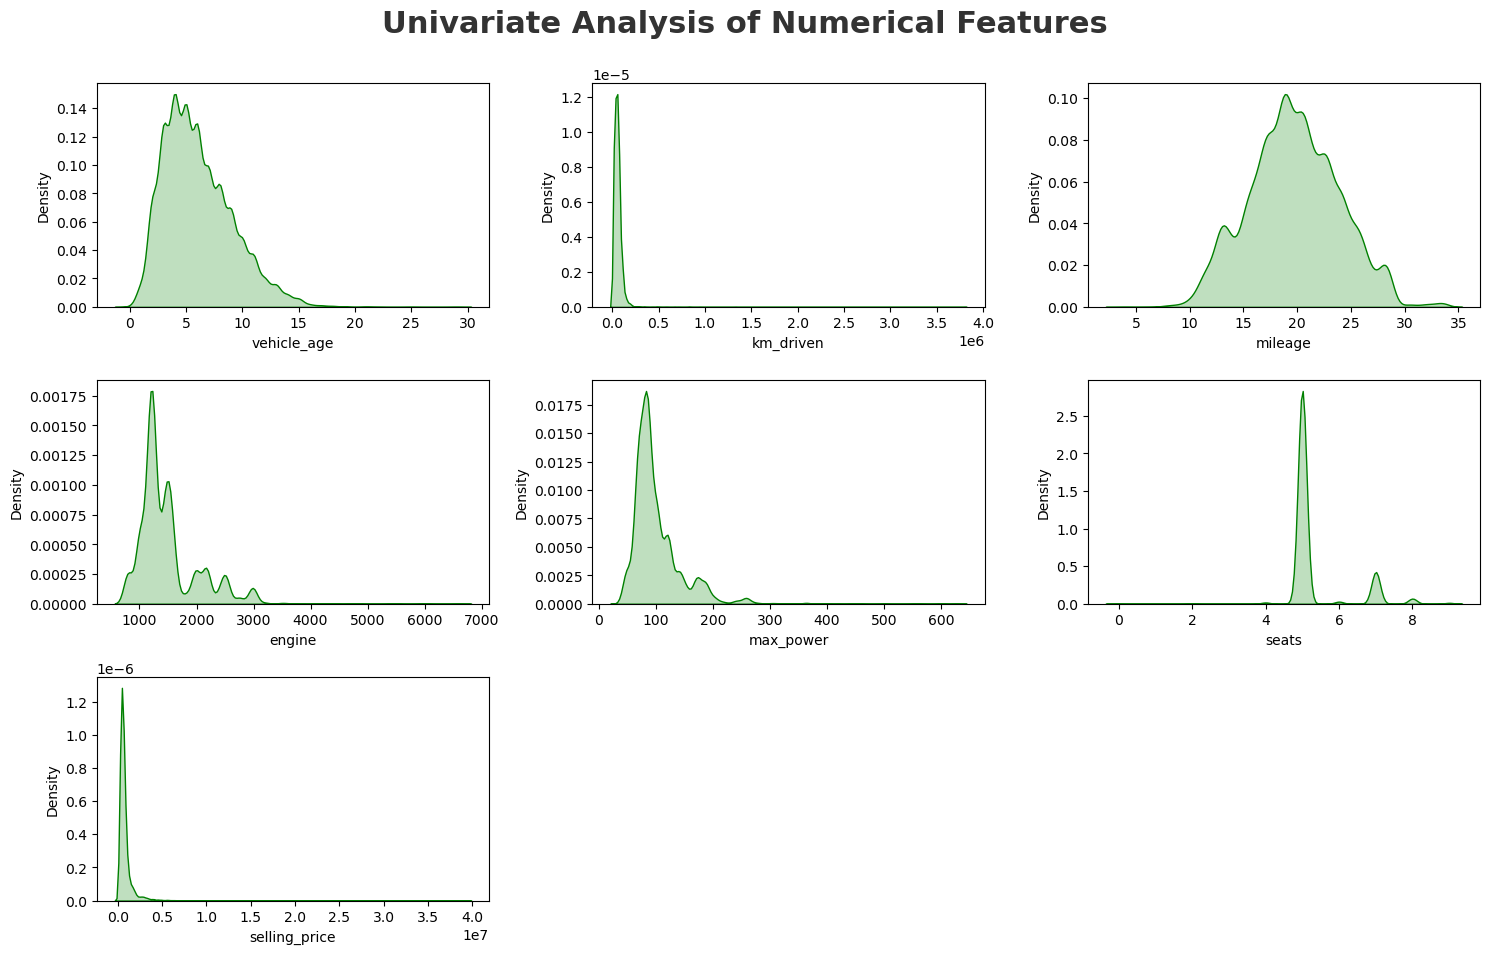

In [8]:
df3 = df.copy()
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=22, fontweight='bold', alpha=0.8, y=1)

for i in range(len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df3[numerical_features[i]], shade=True, color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


**Report**

* The features vehicle_age, km_driven, engine, max_power, and selling_price are all right-skewed.
* There are outliers present in km_driven, engine, max_power, and selling_price.

### Categorical Features

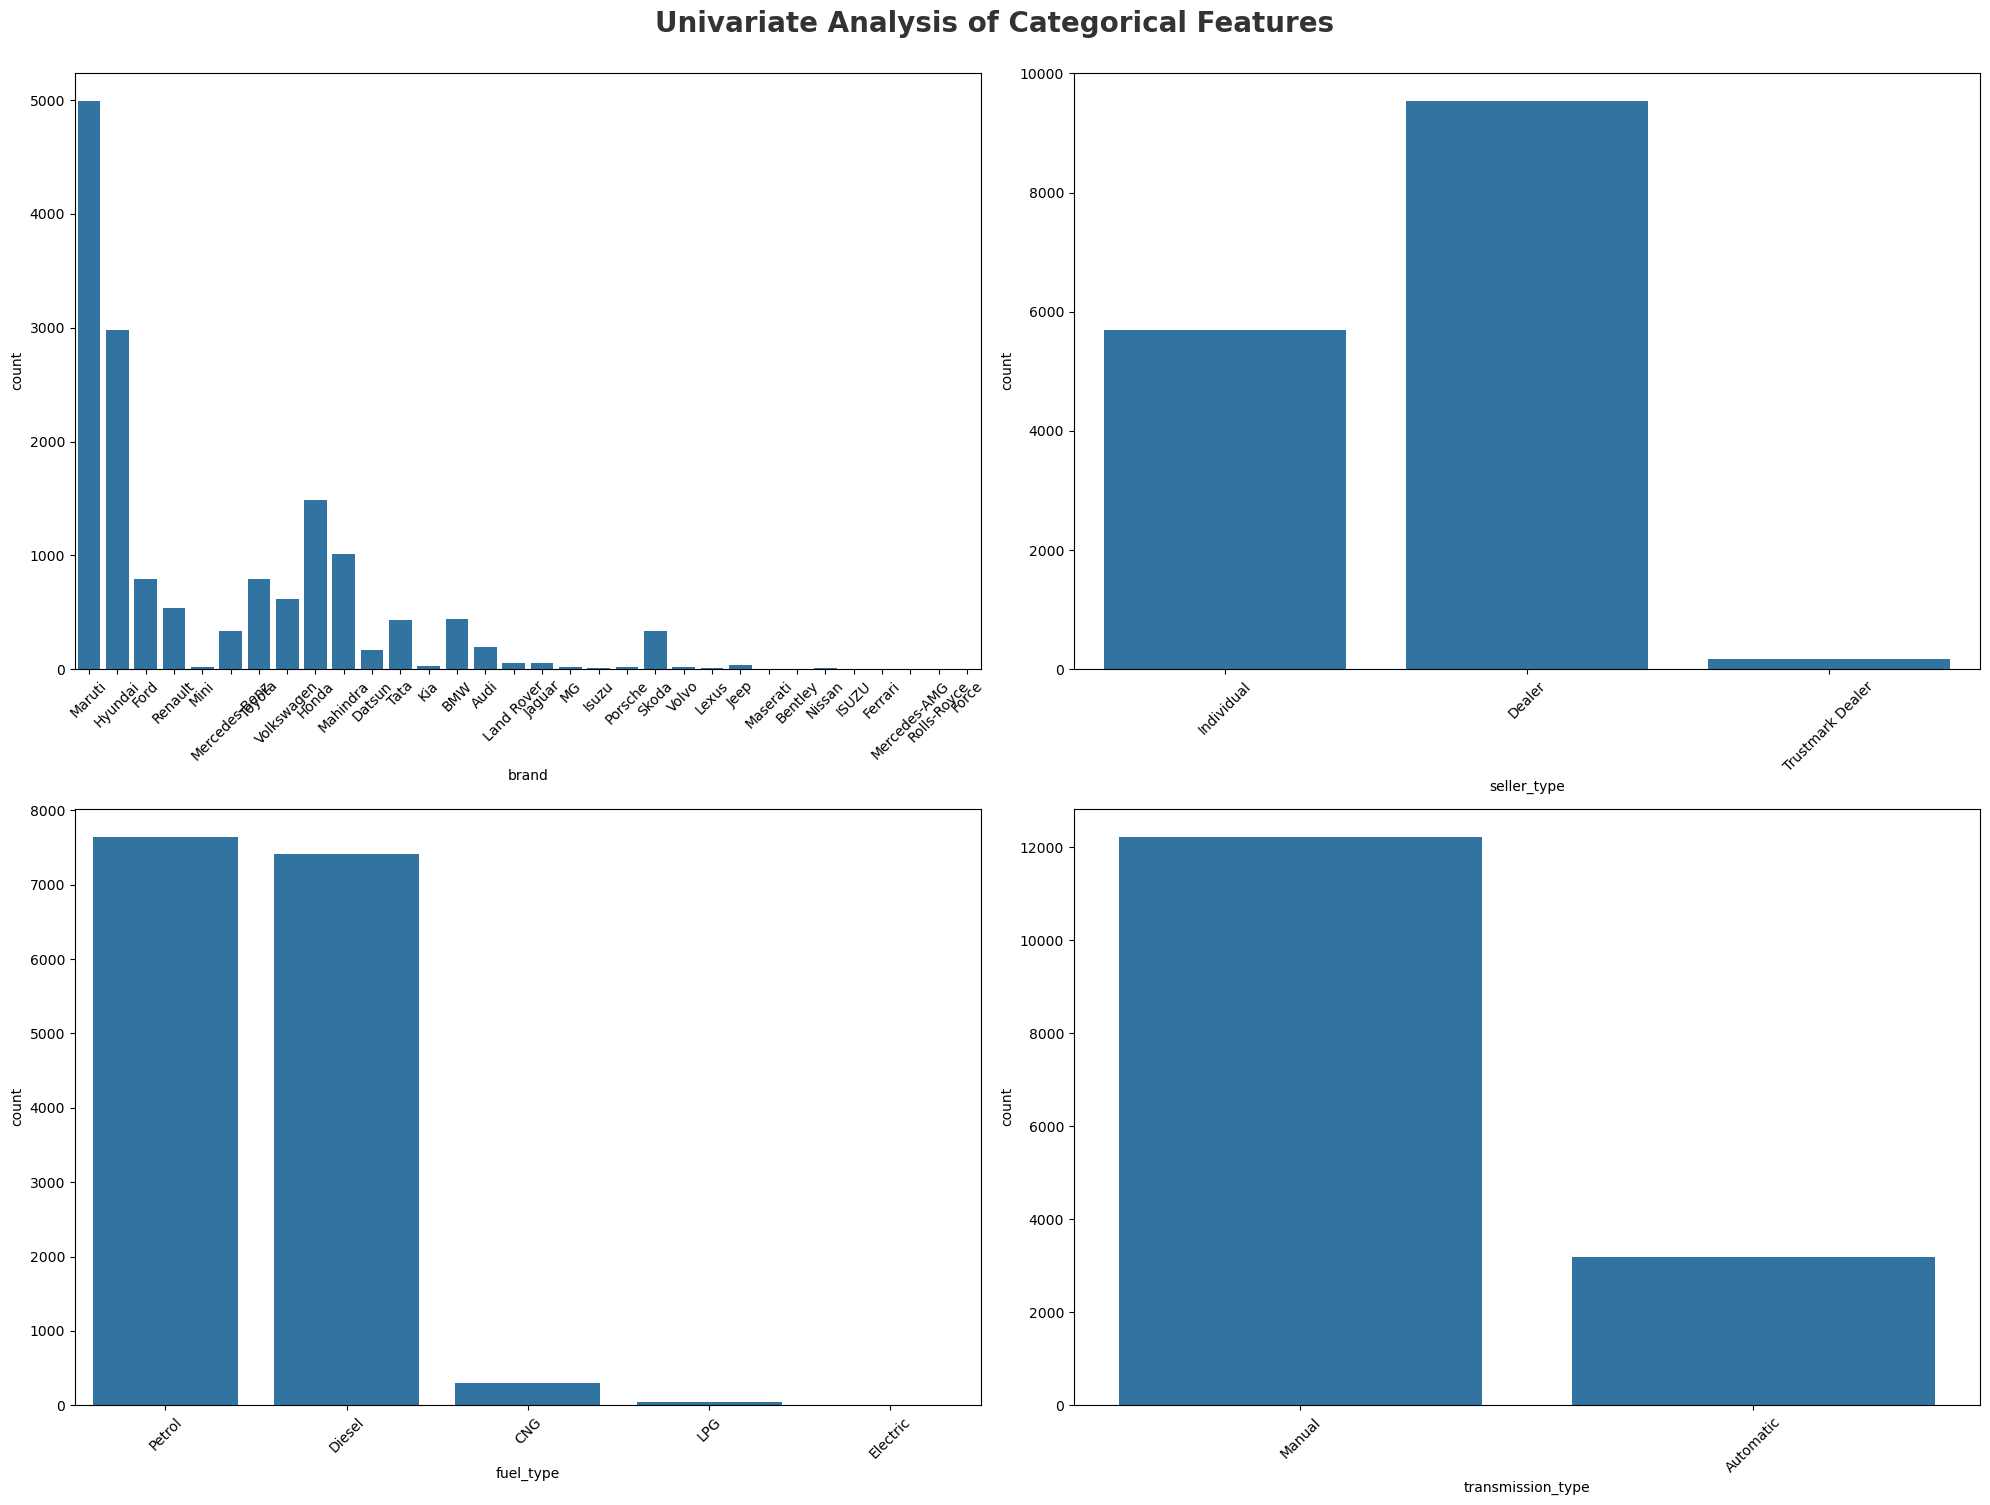

In [9]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


## Multivariate Analysis

**Correlation between Numerical Features**

In [10]:
df[numerical_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


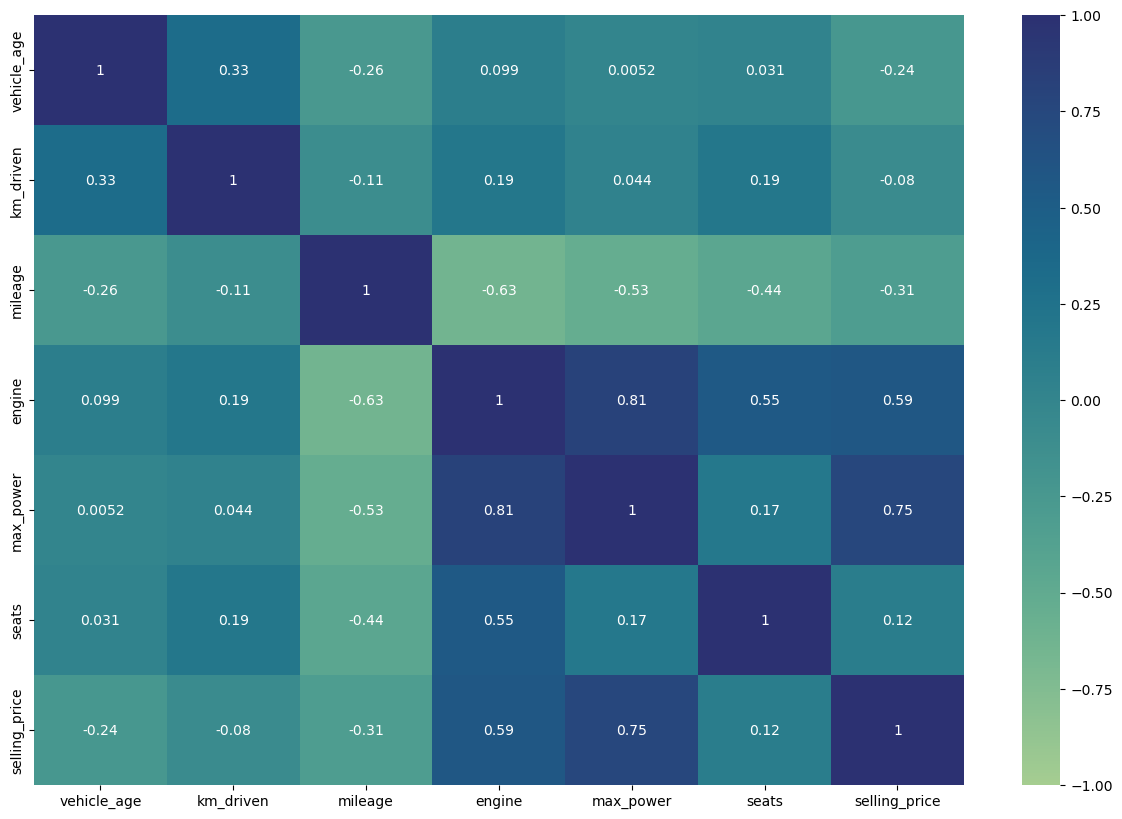

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_features].corr(), cmap="crest", annot=True, vmin=-1, vmax=1)
plt.show()

**Report**
* Relative strong correlation between max_power and selling_price
* Moderate correlation between engine and selling_price


### Null Value Inspection

In [12]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**Report**
* No null values present 

**Extracting Continuous and Discrete Features from Numerical Features**

In [13]:
continuous_features = [feature for feature in numerical_features if len(df[feature].unique())>=10]
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<10]

In [14]:
print('List of continuous features :',continuous_features)
print('List of discrete features :', discrete_features)

List of continuous features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']
List of discrete features : ['seats']


**Scatter plot between continuous features and selling_price**

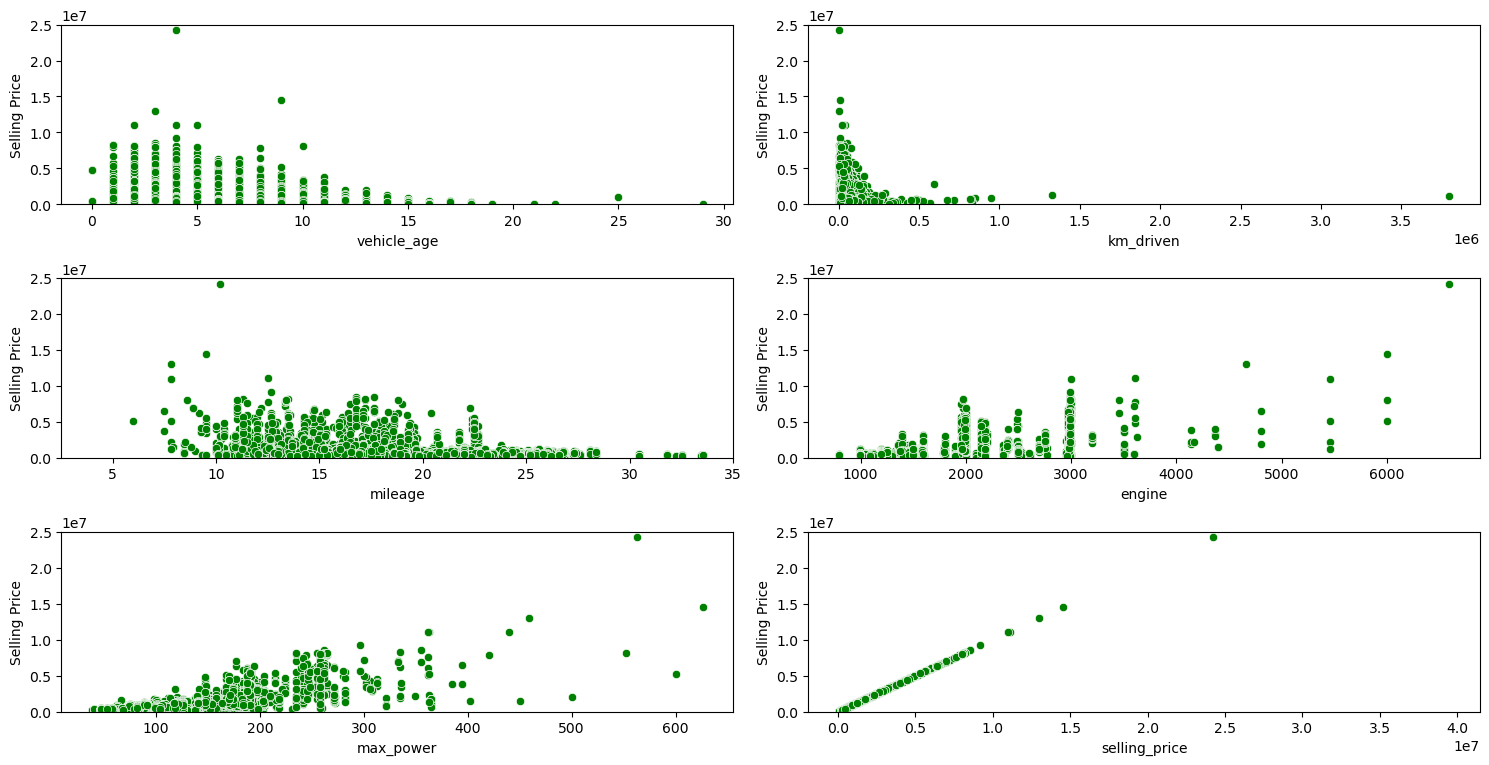

In [15]:
fig = plt.figure(figsize = (15,20))

for i in range(0,len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data = df, y='selling_price', x= continuous_features[i], color='g')
    plt.ylim(0,25000000)
    plt.ylabel('Selling Price')
    plt.xlabel(continuous_features[i])
    plt.tight_layout()
    
     

**Report**
* As vehicle_age and km_driven increase, the selling_price tends to decrease.
* There is no consistent pattern between mileage and selling_price; it varies based on other factors.
* There is a positive correlation between selling_price and max_power.

**Bar plot between discrete features and  median selling_price**

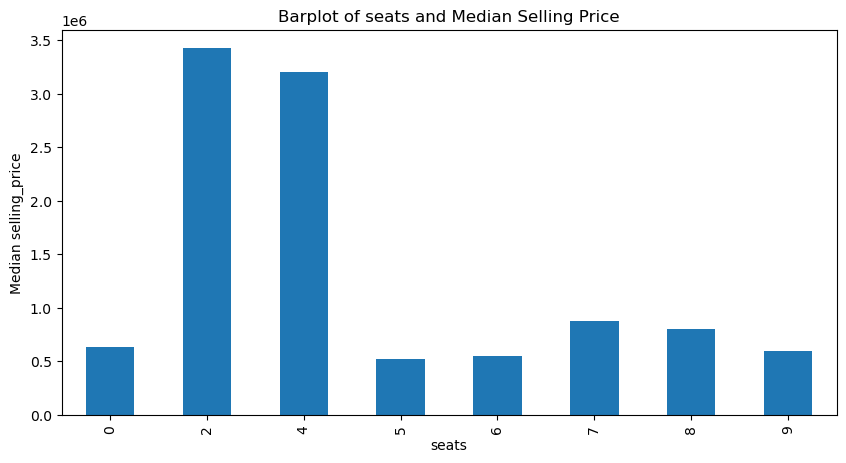

In [16]:
fig = plt.figure(figsize = (10,5))
df.groupby(discrete_features[0])['selling_price'].median().plot(kind='bar')
    
plt.xlabel(discrete_features[0])
plt.ylabel("Median selling_price")
plt.title(f"Barplot of {discrete_features[0]} and Median Selling Price")
plt.show()

**Report**
* Median prices are highest for 2-seater and 4-seater cars.

### Visualization

#### Visualizing Target Variable

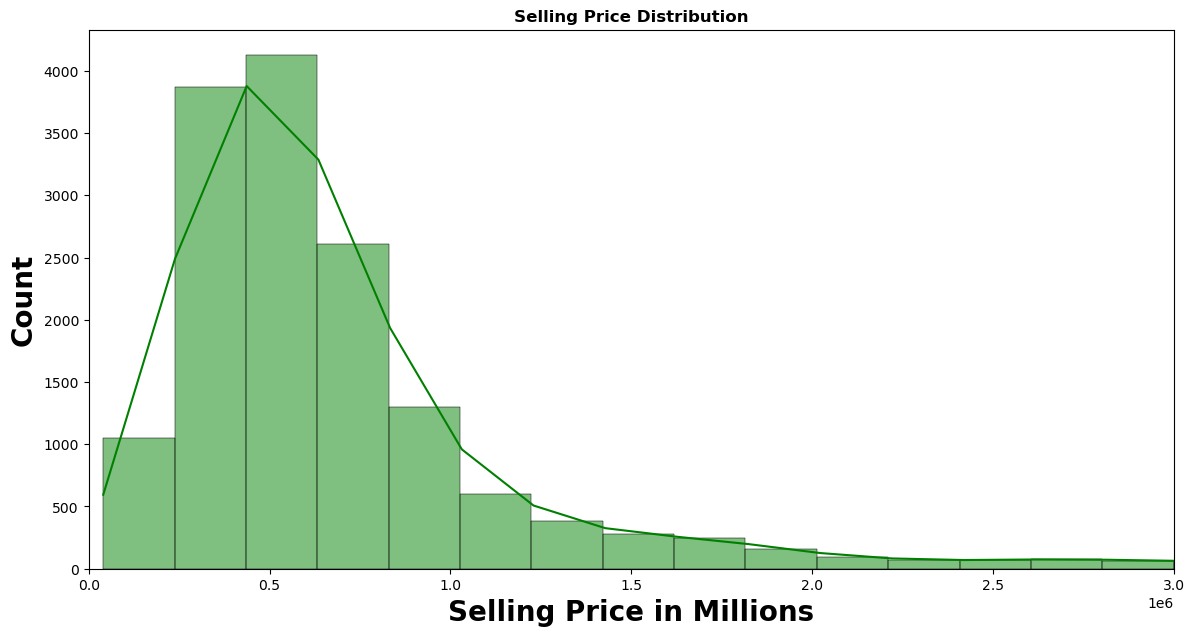

In [17]:
plt.subplots(figsize=(14,7))
sns.histplot(df['selling_price'], bins=200, kde=True, color='g')
plt.title('Selling Price Distribution', weight='bold')
plt.ylabel('Count',weight='bold', fontsize=20)
plt.xlabel('Selling Price in Millions', weight='bold', fontsize=20)
plt.xlim(0,3000000)
plt.show()

**Report**
* selling_price is right skewed

### Top 10 Most Sold Cars

In [18]:
df['car_name'].value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

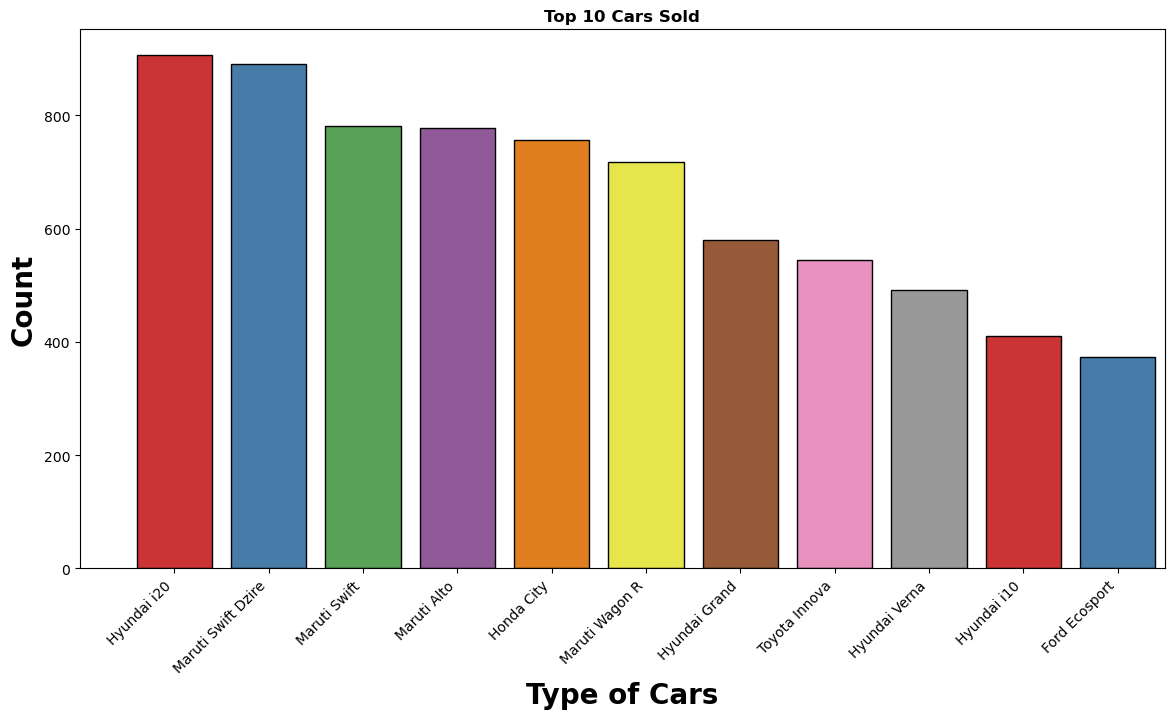

In [19]:
plt.subplots(figsize=(14,7))
sns.countplot(data = df, x='car_name', ec = 'black', palette='Set1', order = df['car_name'].value_counts().index) 
plt.title('Top 10 Cars Sold', weight='bold')
plt.ylabel('Count',weight='bold', fontsize=20)
plt.xlabel('Type of Cars', weight='bold', fontsize=20)
plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 10 Most Sold Brands

In [20]:
df['brand'].value_counts()[0:10]

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

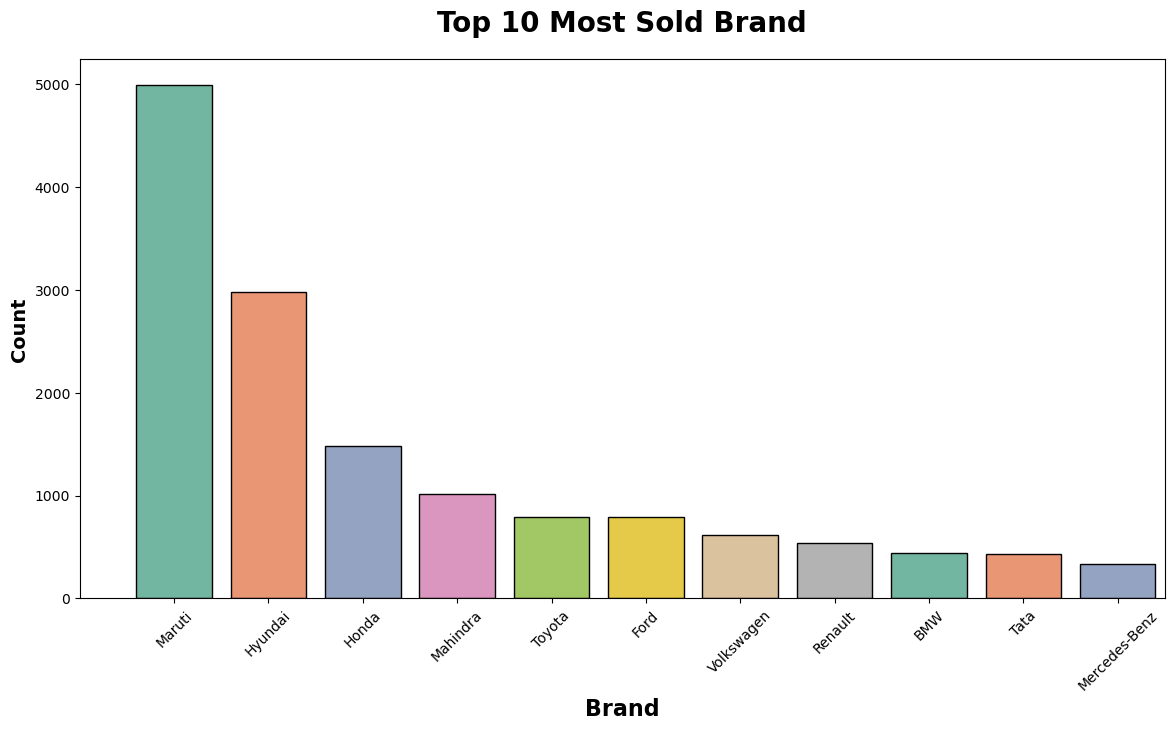

In [21]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**Report:**
* The chart shows that Maruti has the highest number of ads on the used car website and is the most sold brand.
* After Maruti, Hyundai and Honda have the next highest shares.

### Costliest Brand

In [22]:
brand = df.groupby('brand')['selling_price'].max()
brand.sort_values(ascending=False)

brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Jaguar            6300000
Maserati          6200000
Jeep              5600000
Mercedes-AMG      5100000
Mini              3875000
Toyota            3650000
Skoda             3550000
Kia               3525000
Ford              3200000
Honda             3200000
Mahindra          2950000
Hyundai           2600000
Isuzu             2300000
MG                2075000
ISUZU             1900000
Tata              1750000
Nissan            1450000
Volkswagen        1250000
Maruti            1225000
Renault           1155000
Force              700000
Datsun             650000
Name: selling_price, dtype: int64

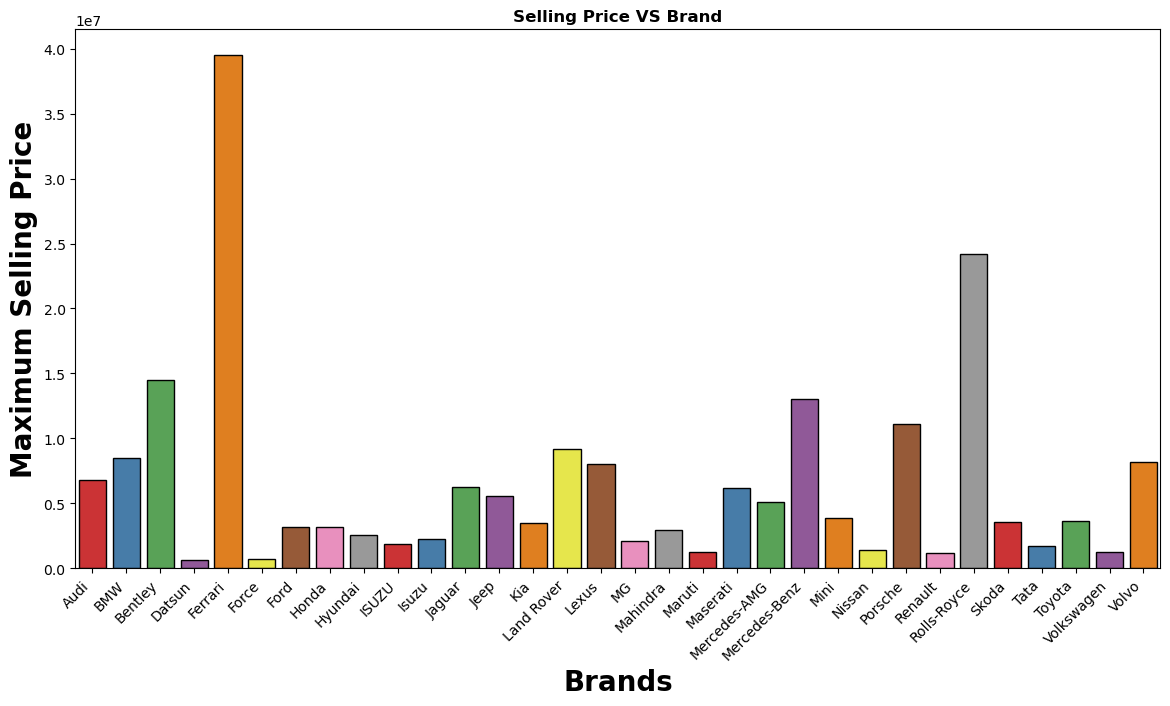

In [23]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values, ec = 'black', palette='Set1') 
plt.title('Selling Price VS Brand', weight='bold')
plt.ylabel('Maximum Selling Price',weight='bold', fontsize=20)
plt.xlabel('Brands', weight='bold', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* The most expensive brand sold is the Ferrari, which is priced at INR 3.9 crores.
* Rolls-Royce follows as the second most expensive, priced at INR 2.42 crores.

### Costliest Car

In [24]:
car = df.groupby('car_name')['selling_price'].max()
car

car_name
Audi A4             4200000
Audi A6             4600000
Audi A8             5500000
Audi Q7             6800000
BMW 3               4500000
                     ...   
Volkswagen Vento    1250000
Volvo S90           4750000
Volvo XC            8195000
Volvo XC60          1825000
Volvo XC90          6975000
Name: selling_price, Length: 121, dtype: int64

In [25]:
costliest_car_df = car.to_frame().sort_values('selling_price',ascending=False)[0:10]
costliest_car_df

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


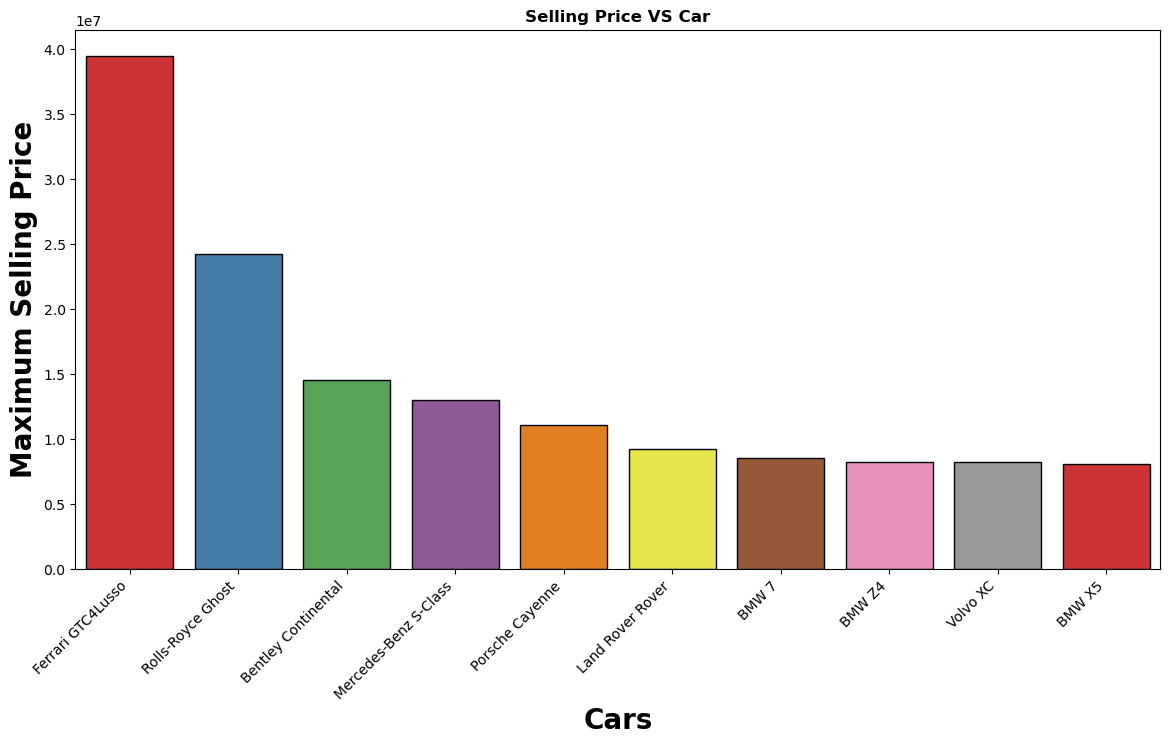

In [26]:
plt.subplots(figsize=(14,7))
sns.barplot(x=costliest_car_df.index, y=costliest_car_df.selling_price, ec = 'black', palette='Set1') 
plt.title('Selling Price VS Car', weight='bold')
plt.ylabel('Maximum Selling Price',weight='bold', fontsize=20)
plt.xlabel('Cars', weight='bold', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* The most expensive car sold is the Ferrari GTC4 Lusso, followed by the Rolls Royce Ghost.
* The Ferrari's selling price is INR 3.95 crores.
* All other cars, except for the Ferrari, are priced below INR 1.5 crores.

### Brand VS Mileage

In [27]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


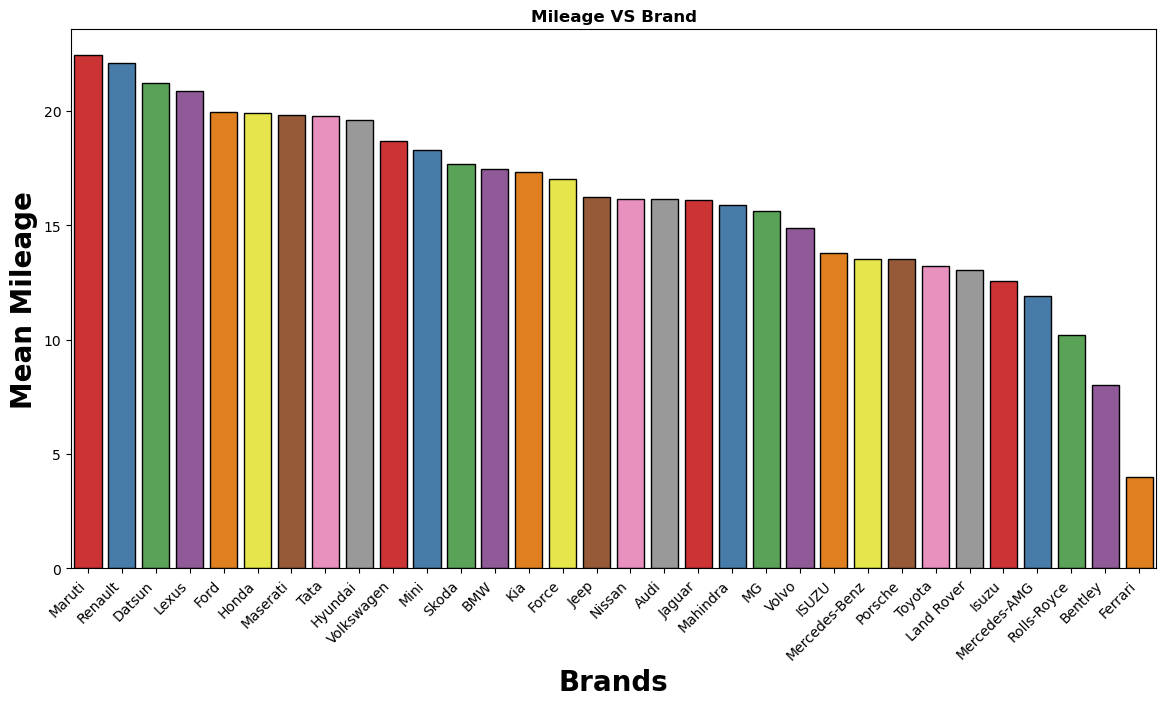

In [28]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = 'black', palette='Set1') 
plt.title('Mileage VS Brand', weight='bold')
plt.ylabel('Mean Mileage',weight='bold', fontsize=20)
plt.xlabel('Brands', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

### Car VS Mileage

In [29]:
#Top 15 cars with highest mean mileage
car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False)[0:15]
car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


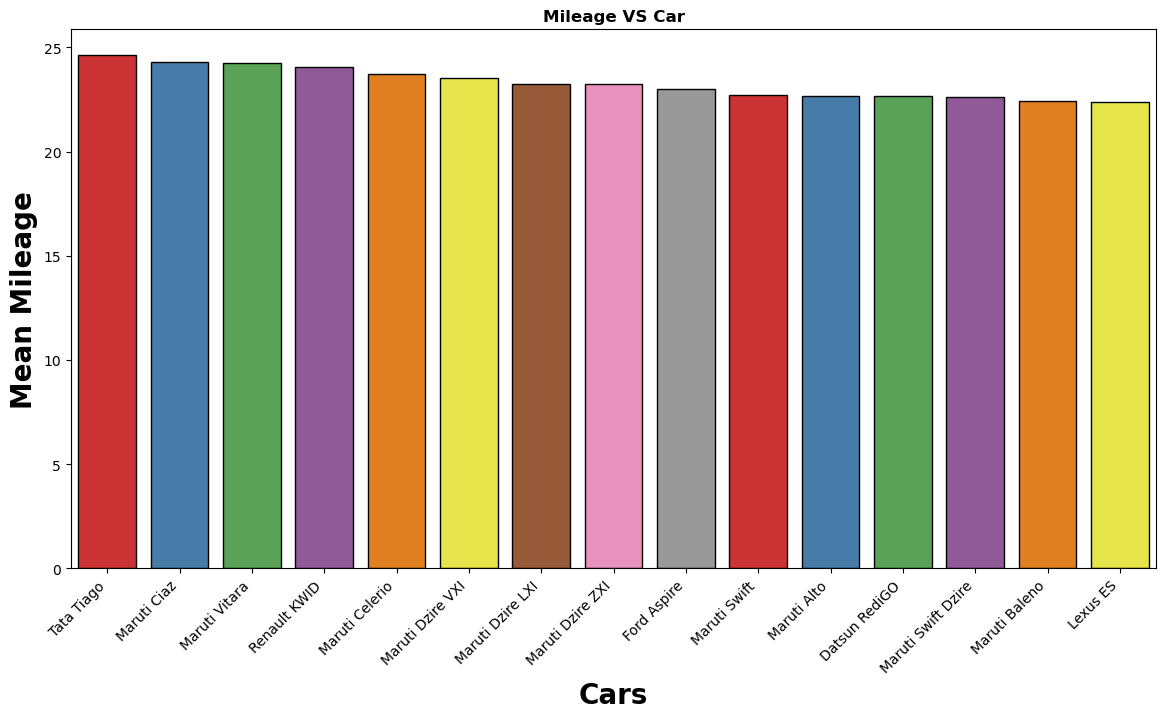

In [30]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.values, ec = 'black', palette='Set1') 
plt.title('Mileage VS Car', weight='bold')
plt.ylabel('Mean Mileage',weight='bold', fontsize=20)
plt.xlabel('Cars', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

### Fuel type and Selling Price

In [31]:
fuel_type = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending = False)
fuel_type

fuel_type
Electric    1857500.0
Diesel       700000.0
Petrol       460000.0
CNG          370000.0
LPG          182500.0
Name: selling_price, dtype: float64

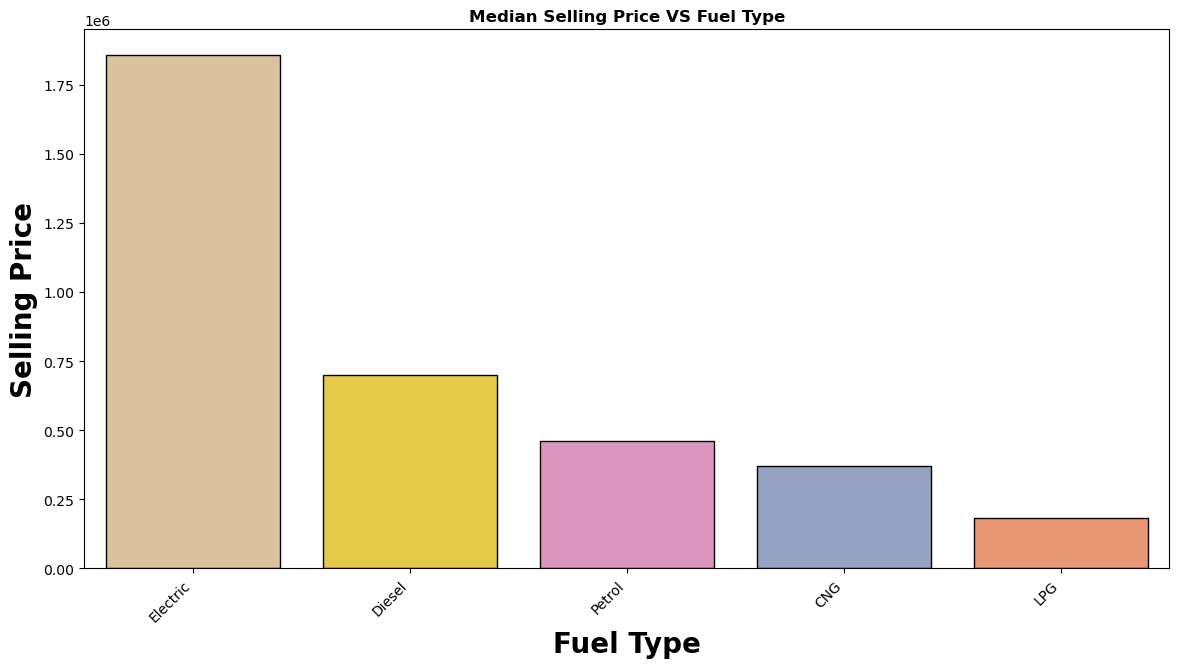

In [32]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel_type.index, y=fuel_type.values, ec = 'black', palette='Set2_r') 
plt.title('Median Selling Price VS Fuel Type', weight='bold')
plt.ylabel('Selling Price',weight='bold', fontsize=20)
plt.xlabel('Fuel Type', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* Electric cars has the highest median selling price.
* LPG run cars has the lowest median selling price.


### Most Sold Fuel Type

In [33]:
fuel_distribution = df['fuel_type'].value_counts()
fuel_distribution

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

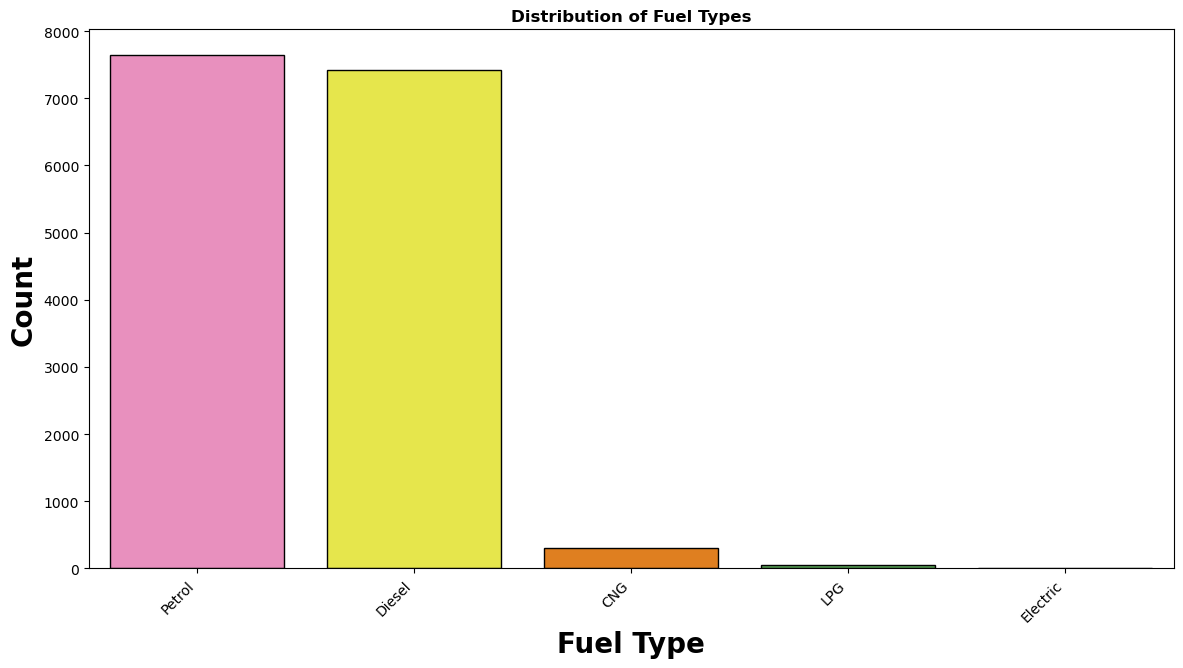

In [34]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df['fuel_type'], ec = 'black', palette='Set1_r') 
plt.title('Distribution of Fuel Types', weight='bold')
plt.ylabel('Count',weight='bold', fontsize=20)
plt.xlabel('Fuel Type', weight='bold', fontsize=20)
#plt.xlim(-1,10.5)
plt.xticks(rotation=45, ha='right')
plt.show()

**Report**
* Petrol and Diesel run cars are sold the most.
* Electric cars are the least preferred.


### Fuel types and Mileage 

In [35]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


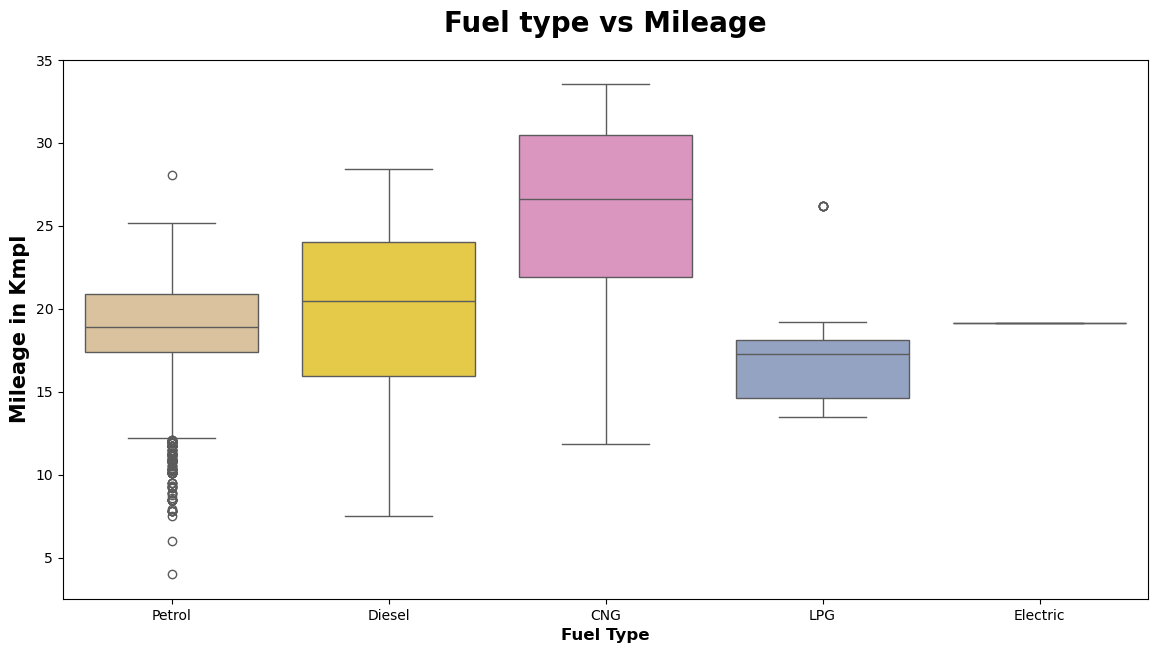

In [36]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df['fuel_type'], y=df['mileage'],palette="Set2_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Mileage vs Selling Price

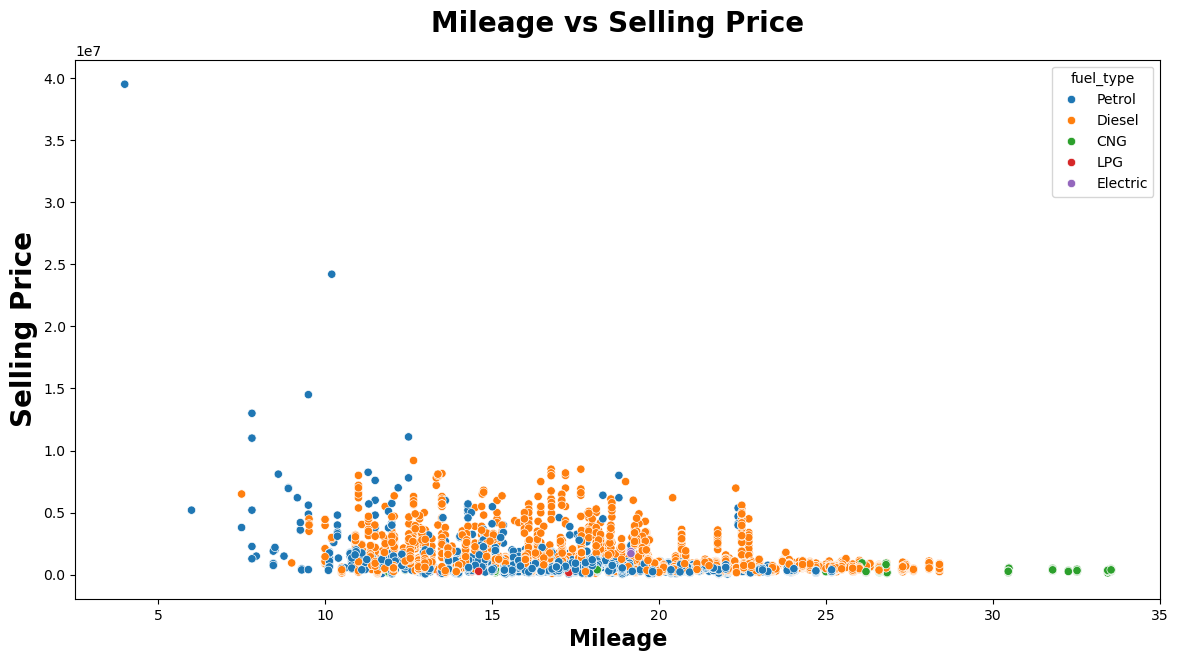

In [37]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x=df["mileage"], y=df["selling_price"],color='g', hue=df["fuel_type"])
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

### Vehicle age vs Selling Price

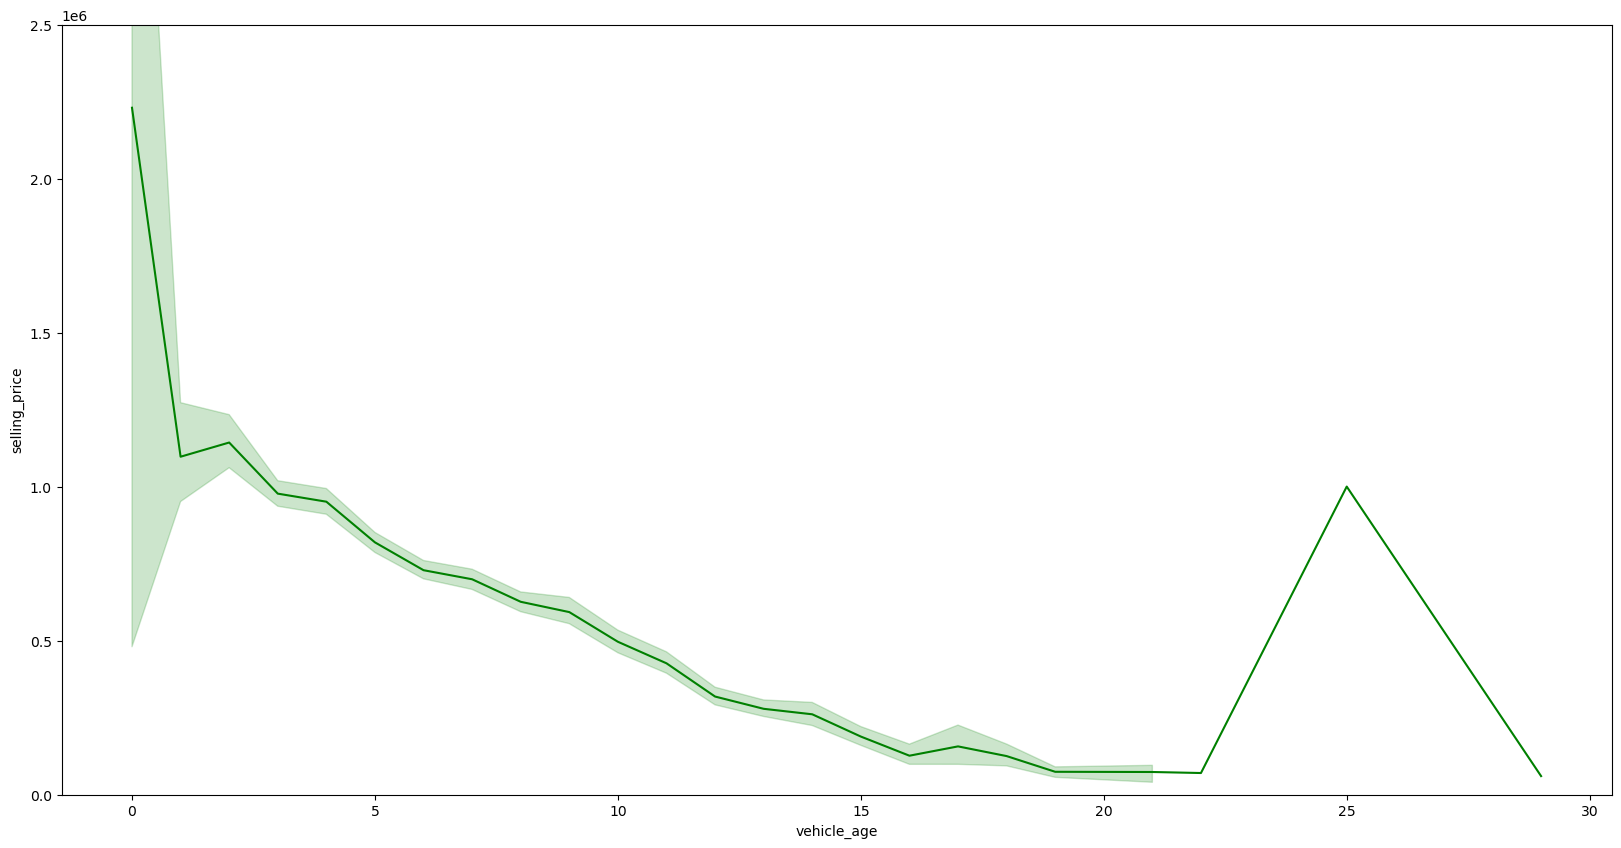

In [38]:
plt.subplots(figsize=(20,10))
sns.lineplot(x=df["vehicle_age"],y=df["selling_price"],color='g')
plt.ylim(0,2500000)
plt.show()

### Vehicle age vs Mileage

In [39]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(15)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51
6,20.14
7,20.00
1,20.00
2,19.60


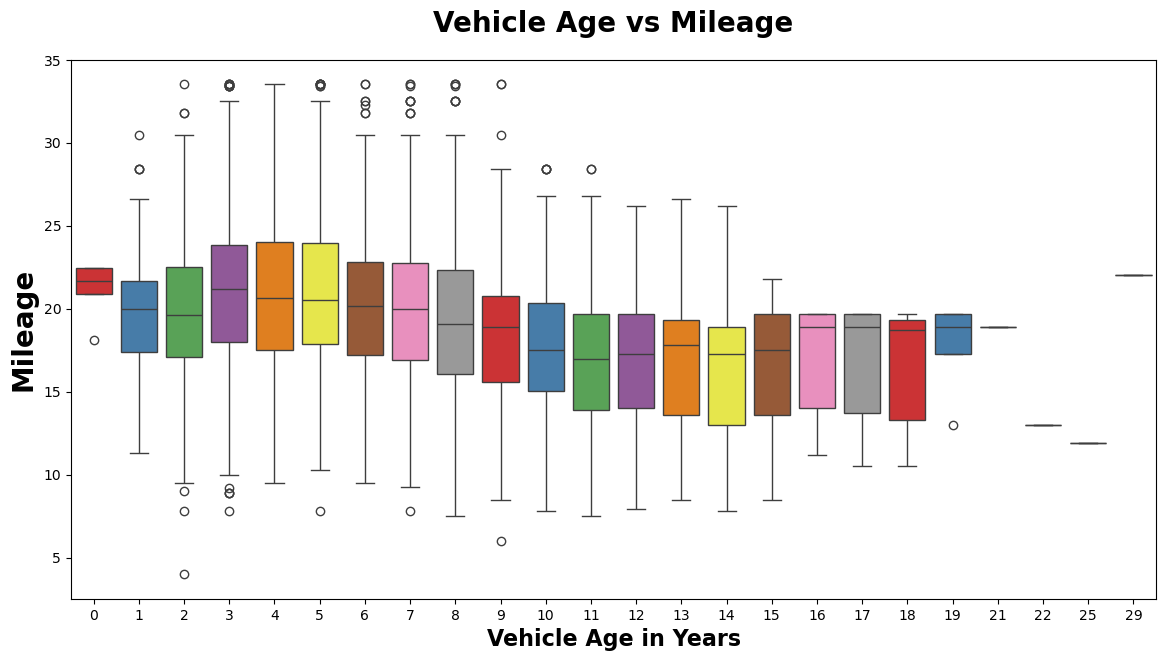

In [40]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df["vehicle_age"], y= df["mileage"], palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

**Report** 
* As the vehicle age increases, the median mileage decreases.
* Newer vehicles have a higher median mileage compared to older ones.

### Transmission Type

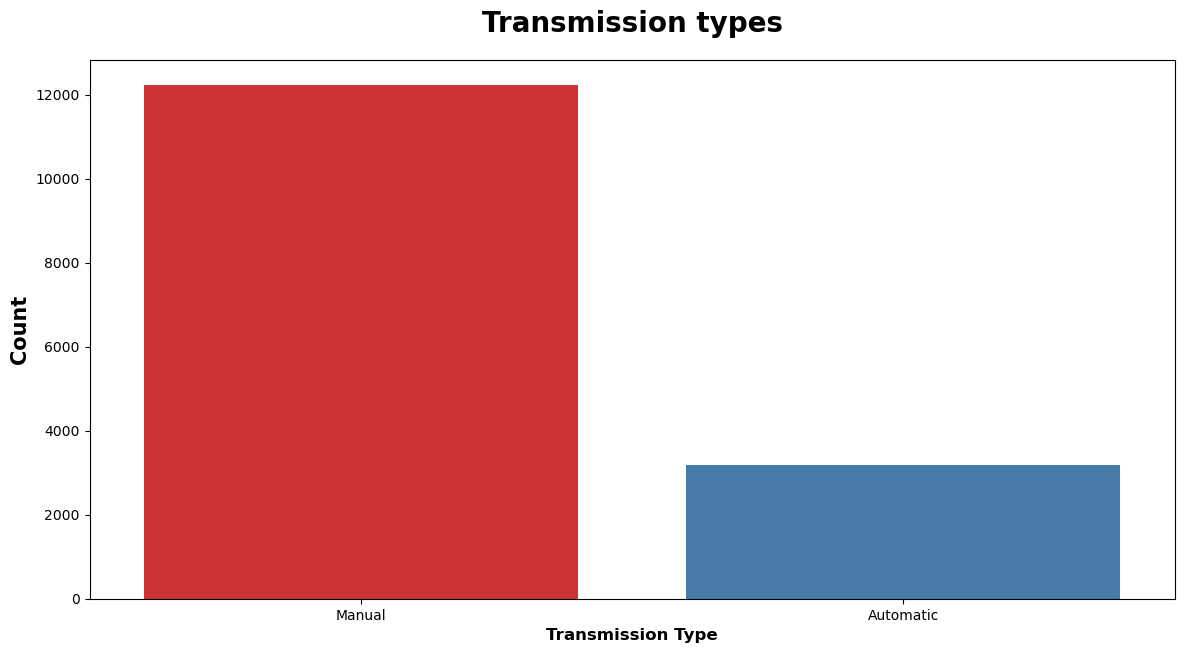

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission types", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

**Selling Price vs Transmission type**

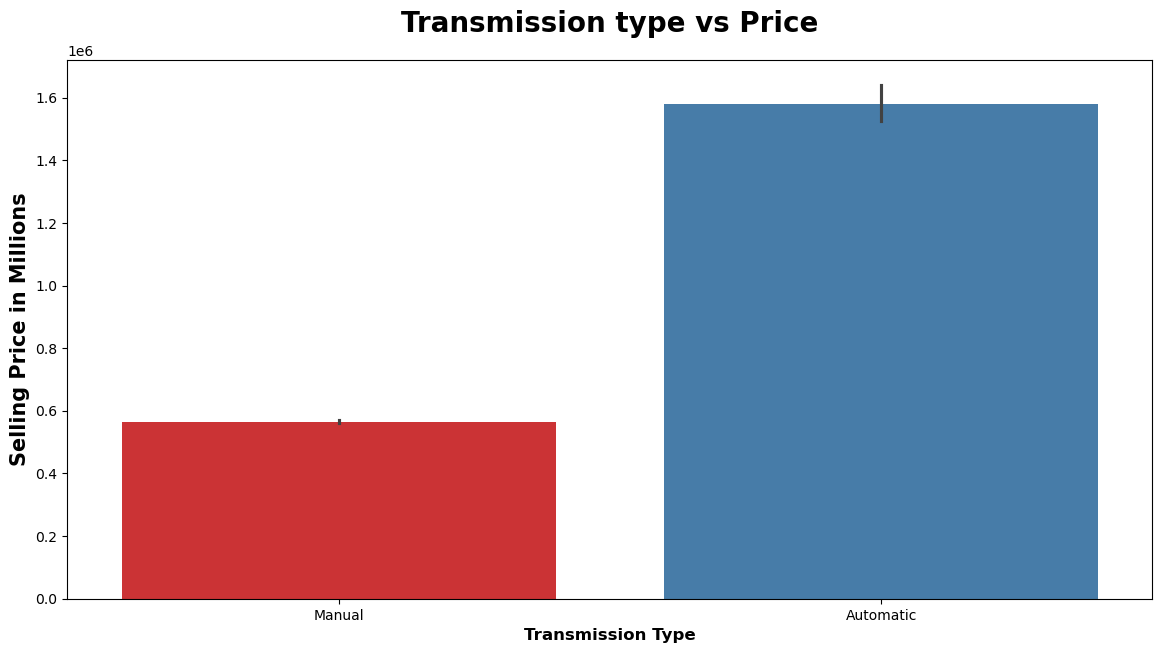

In [42]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df["transmission_type"], y=df["selling_price"],palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

### Seller Types

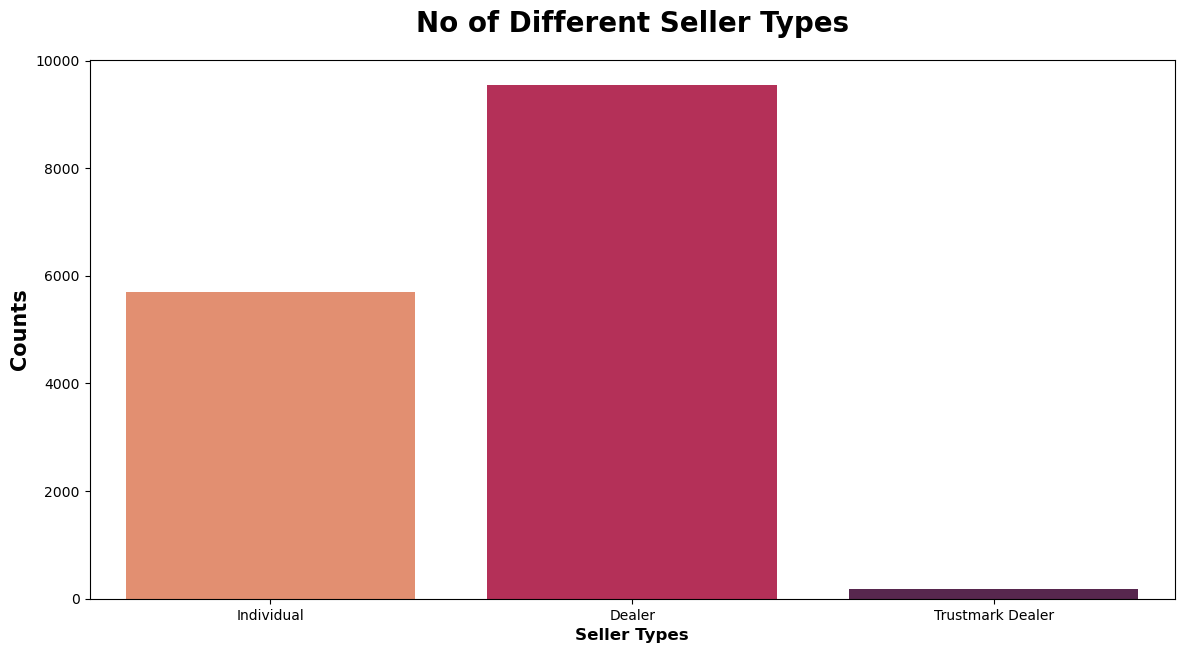

In [43]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("No of Different Seller Types", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Seller Types", weight="bold", fontsize=12)
plt.show()

## Summary of EDA

* The dataset contains 15,411 rows and 13 columns.
* The selling_price column is the target variable, making this a regression problem.
* Outliers are present in the km_driven, engine, selling_price, and max_power columns.
* Dealers are the primary sellers of used cars.
* Some columns exhibit skewness, which will be addressed after handling outliers.
* Vehicle age has an inverse relationship with price.
* Manual cars are sold more frequently, but automatic cars have a higher average selling price.
* Petrol is the most preferred fuel type on the used car website, followed closely by diesel.








## 4) Data Cleaning

### Handling Null Values

In [44]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**Since we have no null values, it is handled**

### Handling Duplicates

In [45]:
df = df.drop_duplicates()

In [46]:
df.shape

(15244, 13)

**We have dropped duplicates, now the shape of dataframe is (15244,13)**

## 5) Data Pre-processing

In [47]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


**Since column 'car_name' is just a combination of columns 'brand' and 'model', we are dropping it.**

In [48]:
print(df.shape)
df.drop('car_name',axis=1,inplace=True)
print(df.shape)

(15244, 13)
(15244, 12)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 0 to 19543
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15244 non-null  object 
 1   model              15244 non-null  object 
 2   vehicle_age        15244 non-null  int64  
 3   km_driven          15244 non-null  int64  
 4   seller_type        15244 non-null  object 
 5   fuel_type          15244 non-null  object 
 6   transmission_type  15244 non-null  object 
 7   mileage            15244 non-null  float64
 8   engine             15244 non-null  int64  
 9   max_power          15244 non-null  float64
 10  seats              15244 non-null  int64  
 11  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


### Handling Outliers 

**We will check outliers in the Continuous Features**

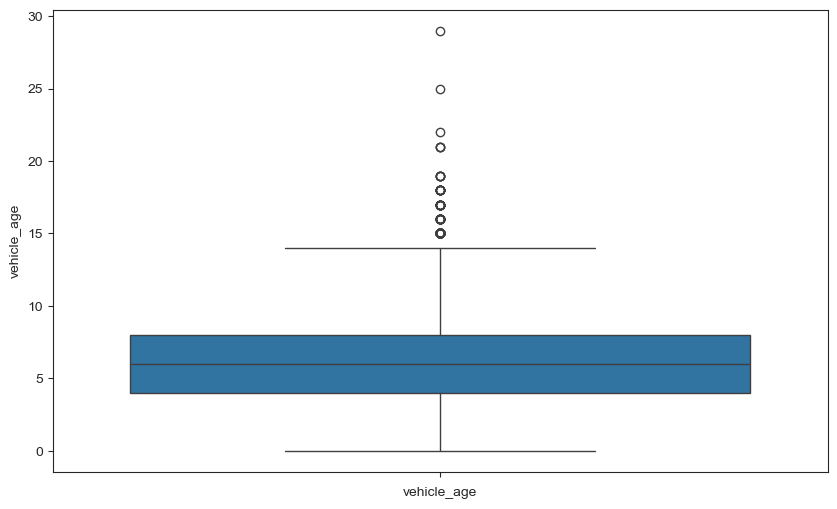

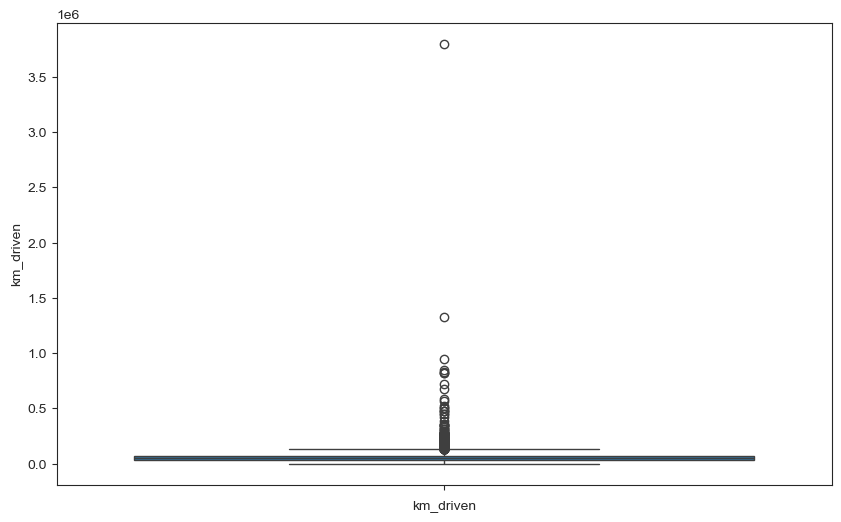

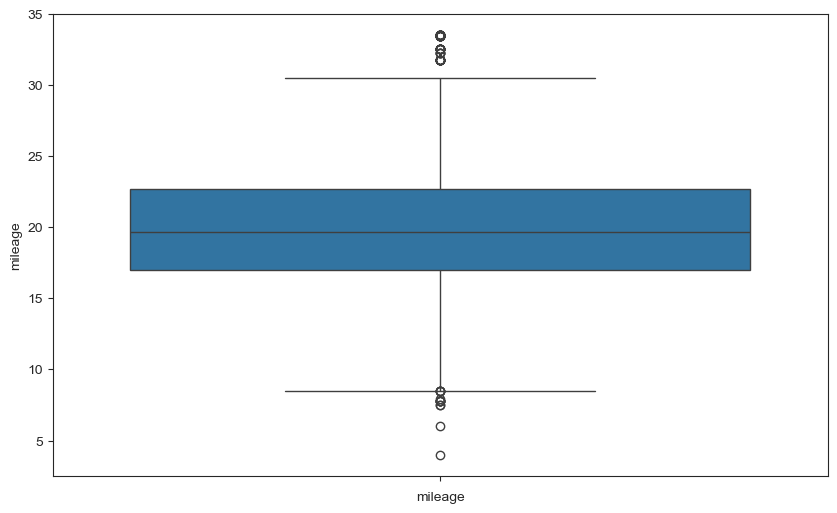

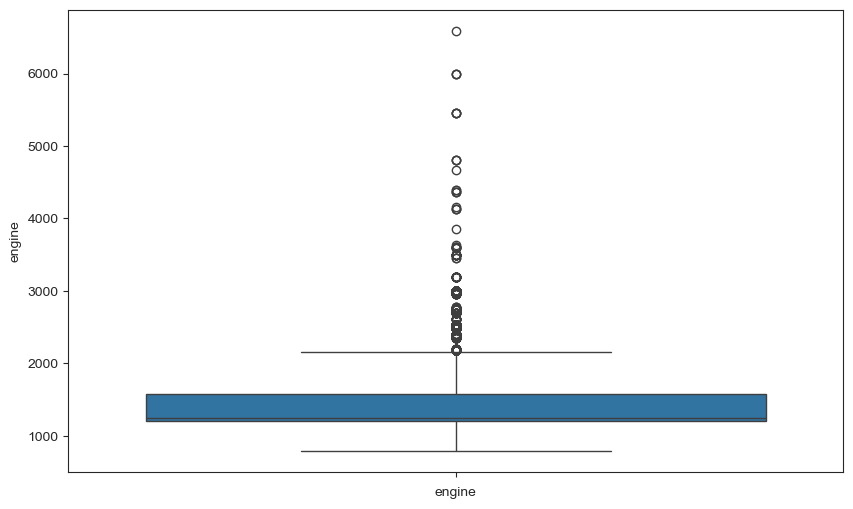

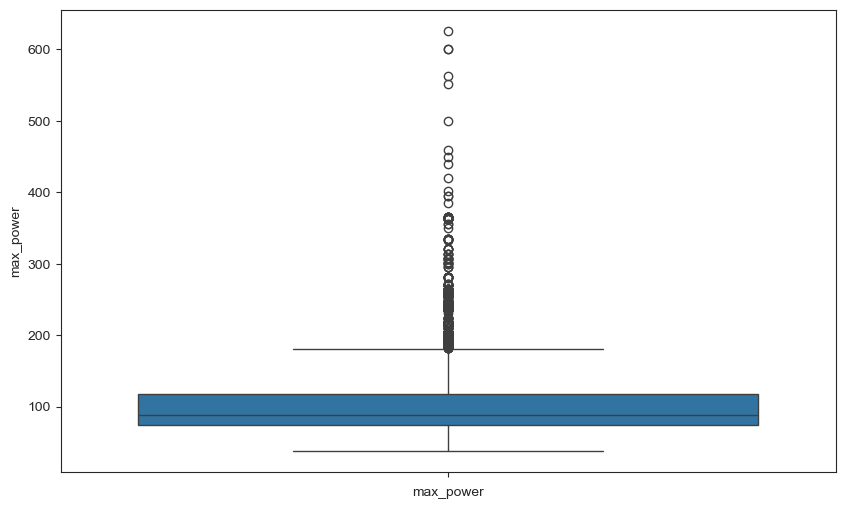

In [ ]:
for i in continuous_features:
    plt.figure(figsize=(10,6))
    sns.set_style('ticks')
    ax = sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()  

**We can see outliers are present in all the continuous features**

### Capping Outliers

In [ ]:
def capping_outliers(col):
    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    print("***** ",col," *****")
    print(f"The 25th percentile is {percentile_25}")
    print(f"The 75th percentile is {percentile_75}")
    IQR = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5*(IQR)
    lower_limit = percentile_25 - 1.5*(IQR)
    print(f"Upper Limit is {upper_limit}")
    print(f"Lower Limit is {lower_limit}")
    df.loc[df[col]>upper_limit,col] = upper_limit
    df.loc[df[col]<lower_limit,col] = lower_limit
    
    return df

In [ ]:
for col in continuous_features:
    capping_outliers(col)

**We have capped the outliers, instead of removing them**

In [ ]:
df[continuous_features].skew(axis=0, skipna=True)*100

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['vehicle_age','km_driven', 'mileage', 'engine', 'max_power', 'selling_price']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[col], color='green')
    plt.xlabel(col)
    plt.tight_layout()

**After outliers capping, distribution has become more normal than before. Remember, earlier it was Right Skewed.**

## 6) Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [ ]:
categorical_features.remove('car_name')

In [ ]:
print(X.columns)

In [ ]:
for feature in categorical_features:
    print(feature,':', X[feature].nunique())

**We need to keep only those brands which have sufficient number of observations.**

In [ ]:
X.head()

In [ ]:
top_15_brands = X['brand'].value_counts(ascending=False).head(15)


In [ ]:
for i in range(df.shape[0]):
    if X['brand'].iloc[i] in brand:
         continue
    else:
        X['brand'].iloc[i] = 'Others'

### Encoding and Scaling

**We are using Standard Scaler for numerical features, One Hot Encoding for categorical variables with
less number of unique values and Binary Encoder for categorical variables with high number of unique values**

In [ ]:
X.head()

In [ ]:
numerical_features.remove('selling_price')

In [ ]:
onehot_columns = ['seller_type','fuel_type','transmission_type']
binary_columns = ['brand', 'model']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, numerical_features),
        ("BinaryEncoder", binary_transformer, binary_columns)
        
    ]
)

In [ ]:
X= preprocessor.fit_transform(X)

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

### Model Selection

**We will try multiple regression modeling techniques**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

**Creating an evaluate function**

In [ ]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression" : LinearRegression(),
    "K-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
}

models_test_mae = {}
models_test_rmse = {}
models_test_r2_square  = {}
  
for i in range(0,len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Accuracy
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    models_test_mae[list(models.keys())[i]] =  model_test_mae
    models_test_rmse[list(models.keys())[i]] =  model_test_rmse
    models_test_r2_square[list(models.keys())[i]] =  model_test_r2
    
    
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')
    

In [ ]:
sorted_models_test_r2_square = dict(sorted(models_test_r2_square.items(), key=lambda item: item[1]))


In [ ]:
sorted_models_test_r2_square = dict(reversed(sorted_models_test_r2_square.items()))

In [ ]:
df_r2 = pd.DataFrame(list(sorted_models_test_r2_square.items()), columns=['Model', 'R2 Score'])

In [ ]:
df_r2

## Best Model

In [ ]:
best_model = CatBoostRegressor(max_depth=8, learning_rate=0.05 ,verbose=False)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)

print("FINAL MODEL 'CatBoost'")
print ("r2 Score value: {:.4f}".format(score))